<a href="https://colab.research.google.com/github/Fahbax/TM10007_group_13/blob/Develop/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template

In [3]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git


Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 62
Unpacking objects: 100% (83/83), 67.93 MiB | 8.16 MiB/s, done.


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [4]:
import os
import pandas as pd
data = pd.read_csv('/content/tm10007_ml/worclipo/Lipo_radiomicFeatures.csv', index_col=0)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 115
The number of columns: 494


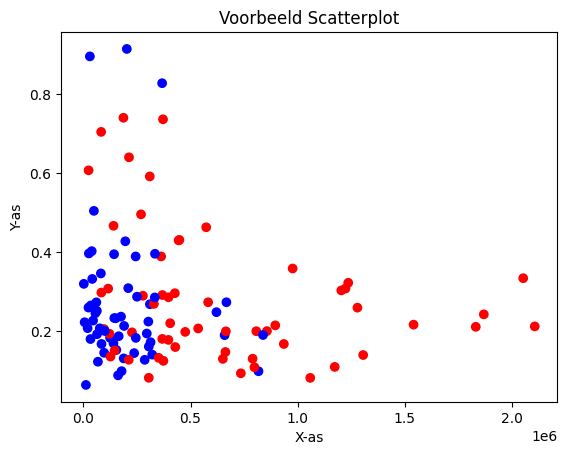

In [6]:
#print(data['label'])#,'PREDICT_original_sf_compactness_avg_2.5D','PREDICT_original_sf_compactness_std_2.5D'])
#df = pd.DataFrame(data, columns=["label", "PREDICT_original_sf_compactness_avg_2.5D","PREDICT_original_sf_compactness_std_2.5D"])
import matplotlib.pyplot as plt
colors = {'liposarcoma': 'red', 'lipoma': 'blue'}
#plt.scatter(data['PREDICT_original_sf_compactness_avg_2.5D'], data['PREDICT_original_sf_compactness_std_2.5D'], c=d['label'].map(colors))
plt.scatter(data['PREDICT_original_sf_volume_2.5D'], data['PREDICT_original_tf_Gabor_range_F0.05_A1.57'], c=data['label'].map(colors))

# Voeg labels toe aan de plot
plt.title('Voorbeeld Scatterplot')
plt.xlabel('X-as')
plt.ylabel('Y-as')

# Toon de plot
plt.show()

In [7]:
ids_test =['Lipo-026_0', 'Lipo-060_0', 'Lipo-068_0', 'Lipo-100_0', 'Lipo-035_0',
 'Lipo-102_0', 'Lipo-019_0', 'Lipo-047_0', 'Lipo-067_0', 'Lipo-034_0',
 'Lipo-082_0', 'Lipo-072_0', 'Lipo-022_0', 'Lipo-038_0', 'Lipo-071_0',
 'Lipo-115_0', 'Lipo-001_0', 'Lipo-097_0', 'Lipo-096_0', 'Lipo-113_0']
# Verwijder de geselecteerde rijen uit de originele dataframe
data_validate_train = data.drop(ids_test)
data_test = data.loc[ids_test]
# Print de dataframe met alleen de geselecteerde rijen
# Print(data_validation)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split de data in train en test sets
X = data_validate_train.drop('label', axis=1)
y = data_validate_train['label']
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

# Maak de beslissingsboom
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Bekijk de belangrijkste features
importance = model.feature_importances_
#for i,v in enumerate(importance):
#    print('Feature: %s, Score: %.10f' % (X.columns[i],v))

# Maak een voorspelling met het model
y_pred = model.predict(X_validate)

# Bereken de nauwkeurigheid van het model
accuracy = accuracy_score(y_validate, y_pred)
print("Nauwkeurigheid: ", accuracy)

Nauwkeurigheid:  0.7333333333333333


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Maak de beslissingsboom
model = KNeighborsClassifier(n_neighbors=10) # de default is 5 buren
model.fit(X_train, y_train)

# Bepaal de belangrijkste features met Permutation Importance
#result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
#importance = result.importances_mean

# Print de belangrijkste features
#for i,v in enumerate(importance):
#    print('Feature: %s, Score: %.5f' % (X.columns[i],v))

# Maak een voorspelling met het model
y_pred = model.predict(X_validate)

# Bereken de nauwkeurigheid van het model
accuracy = accuracy_score(y_validate, y_pred)
print("Nauwkeurigheid: ", accuracy)

Nauwkeurigheid:  0.4666666666666667


In [12]:
import numpy as np
print(importance.max())
# Gebruik argsort om de indexen van de gesorteerde waarden te verkrijgen
sorted_idx = np.argsort(importance)

# De op een na grootste waarde is de waarde bij de een na laatste index in de gesorteerde array
second_largest = importance[sorted_idx[-2]]
third_largest = importance[sorted_idx[-3]]


print(second_largest) 
print(third_largest)

0.3089390142021721
0.12063492063492064
0.11028211554527344


In [13]:
# hiermee kunnen we er nog meer testen
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Maak de beslissingsboom
model = RandomForestClassifier()
model.fit(X_train, y_train)


# Maak een voorspelling met het model
y_pred = model.predict(X_validate)

# Bereken de nauwkeurigheid van het model
accuracy = accuracy_score(y_validate, y_pred)
print("Nauwkeurigheid: ", accuracy)

Nauwkeurigheid:  0.5333333333333333


In [14]:
from scipy.stats import shapiro
df=data.iloc[:,2:]
niet_normaal = 0
for column in df:
    for label in set(data['label']):
        a_values = data.loc[data['label'] == label, column]
        stat, p = shapiro(a_values)
        # interpreteer de uitvoer van de test
        alpha = 0.05
        if p > alpha:
            #print(f'De gegevens lijken normaal verdeeld (fail to reject H0):{column}{label}')
            continue
        else:
            #print(f'De gegevens lijken niet normaal verdeeld (reject H0):{column}{label}')
            niet_normaal+=1


print(niet_normaal)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


783


In [ ]:
# Selecteer 20 willekeurige rijen uit de dataframe
random_samples = data.sample(n=20, axis=0)
ids = random_samples.index.values
print(ids)

['Lipo-026_0' 'Lipo-060_0' 'Lipo-068_0' 'Lipo-100_0' 'Lipo-035_0'
 'Lipo-102_0' 'Lipo-019_0' 'Lipo-047_0' 'Lipo-067_0' 'Lipo-034_0'
 'Lipo-082_0' 'Lipo-072_0' 'Lipo-022_0' 'Lipo-038_0' 'Lipo-071_0'
 'Lipo-115_0' 'Lipo-001_0' 'Lipo-097_0' 'Lipo-096_0' 'Lipo-113_0']
